# Radial Velocity of Galaxy NGC7531
The galaxy data frame records the radial velocity of a spiral galaxy measured at 323 points in the area of sky which it covers. All the measurements lie within seven slots crossing at the origin. The positions of the measurements given by four variables (columns).

Variables:

|               |                                                       |
|---------------|-------------------------------------------------------|
|east.west      |The east-west coordinate. The origin, (0,0), is near <br/>the center of the galaxy, east is negative, west is positive.|
|north.south    |The north-south coordinate. The origin, (0,0), is near<br/> the center of the galaxy, south is negative, north is positive.|
|angle          |Degrees of counter-clockwise rotation from the horizontal <br/>of the slot within which the observation lies.|
|radial.position|Signed distance from origin; negative if east-west coordinate<br/> is negative.|
|velocity       |Radial velocity measured in km/sec.|

SOURCE:<br/>
Buta, R. (1987) The Structure and Dynamics of Ringed Galaxies, III: Surface Photometry and Kinematics of the Ringed Nonbarred Spiral NGC7531. The Astrophysical J. Supplement Ser. Vol. 64, pp. 1--37.

John M. Chambers and Trevor J. Hastie, (eds.) Statistical Models in S, Wadsworth and Brooks, Pacific Grove, CA 1992, pg. 352.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import transforms, pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
# load and prepare data
df = pd.read_csv("../data/Galaxy.txt")
target = 'velocity'
features = ['north.south', 'east.west']
X, y = df[features].values, df[target].values
df.head()

,row.names,east.west,north.south,angle,radial.position,velocity
0,3,8.462789,-38.173172,102.5,39.099998,1769
1,4,7.964978,-35.927692,102.5,36.799999,1749
2,5,7.467167,-33.682213,102.5,34.500001,1749
3,6,6.969356,-31.436731,102.5,32.200000,1758
4,7,6.471544,-29.191250,102.5,29.899999,1750


## Plotting

In [3]:
GRAY3, GRAY7 = '#555655', '#929497'

# prepares 3D plot
def prepare_3d_plot():
    fig = plt.figure(figsize=(4.5, 4.5), dpi=150)
    ax = fig.add_subplot(111, projection='3d')
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.set_xlabel('South-North', color=GRAY3, fontsize=8)
    ax.set_ylabel('East-West', color=GRAY3, fontsize=8)
    ax.w_xaxis.line.set_color(GRAY7)
    ax.w_yaxis.line.set_color(GRAY7)
    ax.w_zaxis.line.set_color(GRAY7)
    ax.view_init(34, -20)
    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticklabels([])
    frame1.axes.yaxis.set_ticklabels([])
    frame1.axes.zaxis.set_ticklabels([])
    ax.yaxis.labelpad=-15
    ax.xaxis.labelpad=-15
    return ax

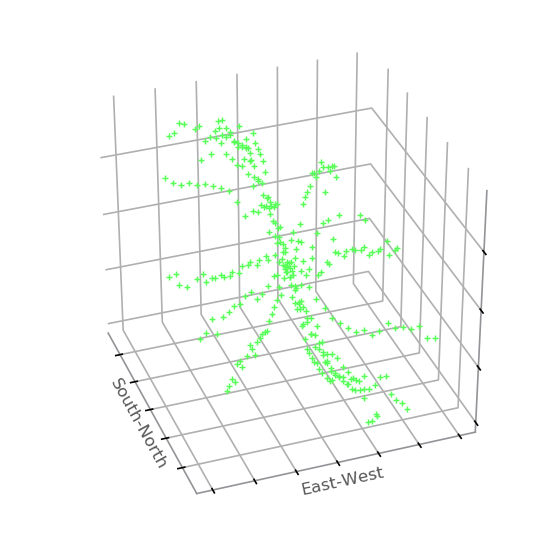

In [4]:
# plot galaxy data, we use -X[:,1] to be consistend with the book
ax = prepare_3d_plot()
_ = ax.scatter(X[:,0], -X[:,1], y, color='#59FF59', marker='+', s=7, 
               linewidth=0.7, depthshade=False)

# Local Regression in IRp

In [5]:
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression

In [6]:
# we use tri-cube K-means kernel
# the book has information only about K-means, but the resulting plot looks close
def KMeansKernel(X, k, x0):        
    dists = cdist(X, x0)
    idx = np.argpartition(dists, k, axis=0)[:k]
    l = np.max(dists[idx])
    t = cdist(X, x0)/l
    result = (t<=1)*(1-t**3)**3
    return np.squeeze(result)

In [7]:
# prepare meshgrid for surface and wireframe plotting
X0I, X1I = np.meshgrid(np.linspace(np.min(X[:,0]), np.max(X[:,0]), 25), 
                       np.linspace(np.min(X[:,1]), np.max(X[:,1]), 25))
YI = np.zeros(shape=X0I.shape)

# perform local linear regression
lr = LinearRegression()
for i in range(X0I.shape[0]):
    for j in range(X0I.shape[1]):
        x0 = np.array([[X0I[i, j], X1I[i, j]]])
        # 50 is about 15% observations
        lr.fit(X, y, KMeansKernel(X, 50, x0))
        YI[i, j] = lr.predict(x0)

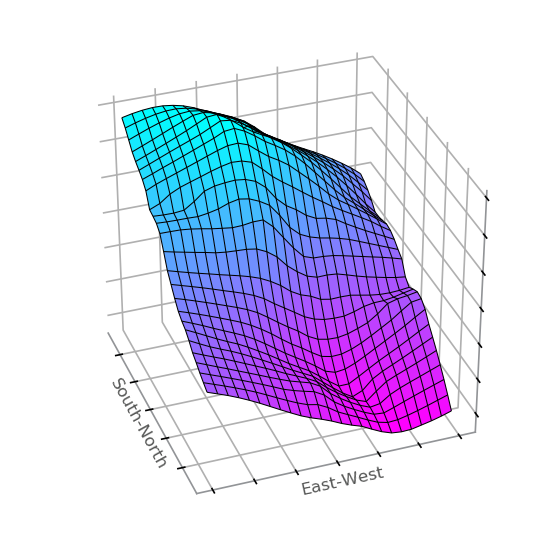

In [8]:
#PAGE 201. FIGURE 6.8. The left panel shows three-dimensional data, where the response
#          is the velocity measurements on a galaxy, and the two predictors record positions
#          on the celestial sphere. The unusual “star”-shaped design indicates the way the
#          measurements were made, and results in an extremely irregular boundary. The
#          right panel shows the results of local linear regression smoothing in IR2,
#          using a nearest-neighbor window with 15% of the data.

# prepare colormap that looks similar to the book's one
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(1, 0, N)
vals[:, 1] = np.linspace(0, 1, N)
vals[:, 2] = np.linspace(1, 1, N)
newcmp = ListedColormap(vals)


# PAGE 201. Although the scatter-cloud and wire-frame pictures in Figure 6.8 look attractive, 
#           it is quite difficult to interpret the results except at a gross level.
#           From a data analysis perspective, conditional plots are far more useful.
ax = prepare_3d_plot()
ax.plot_surface(X0I, -X1I, YI, cmap=newcmp, shade=False)
_ = ax.plot_wireframe(X0I, -X1I, YI, cmap=newcmp, linewidth=0.5, color='black')